In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [4]:
x = sp.symbols('x')
sp.init_printing(use_unicode=True)

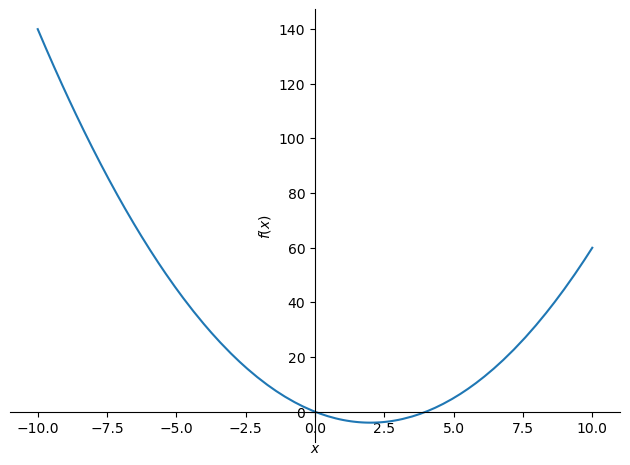

In [5]:
y = x ** 2 - 4*x
sp.plotting.plot(y)

In [7]:
ydiff2 = sp.diff(y, x, 2)
(ydiff2, sp.solveset(ydiff2>=0, x, sp.Reals))

So convex. So Gradient Descent.

In [34]:
def gradient_descent(y, η, x_o):
    i = 0
    while True:
        x_n = x_o - η * sp.diff(y, x).subs(sp.Symbol('x'), x_o)
        print(i, x_n)
        
        if x_n == x_o:
            return x_n
        
        x_o = x_n
        i += 1

In [35]:
η = 0.25
x_o = 1.5

x_min = gradient_descent(y, η, x_o)
print("Minimum value of x:", x_min)

0 1.75000000000000
1 1.87500000000000
2 1.93750000000000
3 1.96875000000000
4 1.98437500000000
5 1.99218750000000
6 1.99609375000000
7 1.99804687500000
8 1.99902343750000
9 1.99951171875000
10 1.99975585937500
11 1.99987792968750
12 1.99993896484375
13 1.99996948242188
14 1.99998474121094
15 1.99999237060547
16 1.99999618530273
17 1.99999809265137
18 1.99999904632568
19 1.99999952316284
20 1.99999976158142
21 1.99999988079071
22 1.99999994039536
23 1.99999997019768
24 1.99999998509884
25 1.99999999254942
26 1.99999999627471
27 1.99999999813735
28 1.99999999906868
29 1.99999999953434
30 1.99999999976717
31 1.99999999988358
32 1.99999999994179
33 1.99999999997090
34 1.99999999998545
35 1.99999999999272
36 1.99999999999636
37 1.99999999999818
38 1.99999999999909
39 1.99999999999955
40 1.99999999999977
41 1.99999999999989
42 1.99999999999994
43 1.99999999999997
44 1.99999999999999
45 1.99999999999999
46 2.00000000000000
47 2.00000000000000
48 2.00000000000000
49 2.00000000000000
50 2.00000

In [36]:
def gradient_descent(y, η, x_o, threshold=1e-7):
    x = sp.Symbol('x')
    points = [(x_o, y.subs(x, x_o))]
    i = 0

    while True:
        x_n = x_o - η * sp.diff(y, x).subs(x, x_o)
        print(i, x_n)
        points.append((x_n, y.subs(x, x_n)))
        
        if abs(x_n - x_o) < threshold:
            break
        
        x_o = x_n
        i += 1
    
    return x_n, points

In [37]:
η = 0.25
x_o = 1.5

x_min = gradient_descent(y, η, x_o)
print("Minimum value of x:", x_min)

0 1.75000000000000
1 1.87500000000000
2 1.93750000000000
3 1.96875000000000
4 1.98437500000000
5 1.99218750000000
6 1.99609375000000
7 1.99804687500000
8 1.99902343750000
9 1.99951171875000
10 1.99975585937500
11 1.99987792968750
12 1.99993896484375
13 1.99996948242188
14 1.99998474121094
15 1.99999237060547
16 1.99999618530273
17 1.99999809265137
18 1.99999904632568
19 1.99999952316284
20 1.99999976158142
21 1.99999988079071
22 1.99999994039536
Minimum value of x: (1.99999994039536, [(1.5, -3.75000000000000), (1.75000000000000, -3.93750000000000), (1.87500000000000, -3.98437500000000), (1.93750000000000, -3.99609375000000), (1.96875000000000, -3.99902343750000), (1.98437500000000, -3.99975585937500), (1.99218750000000, -3.99993896484375), (1.99609375000000, -3.99998474121094), (1.99804687500000, -3.99999618530273), (1.99902343750000, -3.99999904632568), (1.99951171875000, -3.99999976158142), (1.99975585937500, -3.99999994039536), (1.99987792968750, -3.99999998509884), (1.9999389648437

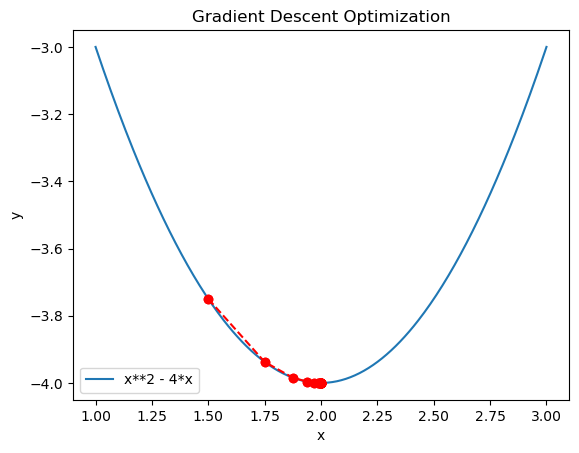

In [38]:
x_vals = np.linspace(1, 3, 300)
y_vals = [y.subs(x, val) for val in x_vals]
points_x, points_y = zip(*points)

plt.plot(x_vals, y_vals, label=str(y))
plt.scatter(points_x, points_y, color='red')
plt.plot(points_x, points_y, color='red', linestyle='--', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Optimization')
plt.legend()
plt.show()